## Multi classification problem using pytorch
### Datasets from sklearn (wine)
#### Each wine has 13 features which are 'alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline' and can be classified into 3 types.

In [2]:
from sklearn import datasets
import matplotlib.pyplot as plt
import random
import torch
from torch import nn
loaded_data = datasets.load_wine()
data_X = loaded_data.data
data_Y = loaded_data.target
print(loaded_data.feature_names,"\n",loaded_data.target_names)
data_X = torch.from_numpy(data_X)
data_Y = torch.from_numpy(data_Y)
data_Y = data_Y.type(torch.long)
#print(data_X)
print(data_X)
#print(train_data_X,"\n",test_data_X)
input_size = data_X.shape[1]
output_size = 3
print(data_Y.type)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline'] 
 ['class_0' 'class_1' 'class_2']
tensor([[1.4230e+01, 1.7100e+00, 2.4300e+00,  ..., 1.0400e+00, 3.9200e+00,
         1.0650e+03],
        [1.3200e+01, 1.7800e+00, 2.1400e+00,  ..., 1.0500e+00, 3.4000e+00,
         1.0500e+03],
        [1.3160e+01, 2.3600e+00, 2.6700e+00,  ..., 1.0300e+00, 3.1700e+00,
         1.1850e+03],
        ...,
        [1.3270e+01, 4.2800e+00, 2.2600e+00,  ..., 5.9000e-01, 1.5600e+00,
         8.3500e+02],
        [1.3170e+01, 2.5900e+00, 2.3700e+00,  ..., 6.0000e-01, 1.6200e+00,
         8.4000e+02],
        [1.4130e+01, 4.1000e+00, 2.7400e+00,  ..., 6.1000e-01, 1.6000e+00,
         5.6000e+02]], dtype=torch.float64)
<built-in method type of Tensor object at 0x000002306CC9CA40>


In [149]:
train_num = 120
index = random.sample(range(0,178), train_num)
a = list(range(0,178))
for i in index:
    a.remove(i)
print(index)
print(a)

[50, 119, 46, 131, 64, 105, 130, 58, 84, 97, 111, 106, 77, 157, 121, 76, 56, 90, 10, 42, 177, 173, 153, 167, 65, 102, 158, 11, 146, 72, 150, 27, 109, 23, 104, 125, 99, 12, 160, 69, 51, 78, 39, 20, 147, 148, 171, 82, 37, 31, 144, 107, 57, 81, 54, 100, 32, 28, 138, 48, 124, 141, 5, 110, 135, 91, 43, 70, 166, 24, 164, 134, 170, 95, 168, 112, 29, 151, 36, 49, 71, 122, 89, 16, 155, 0, 156, 123, 26, 140, 162, 176, 149, 101, 17, 74, 18, 161, 73, 92, 159, 47, 98, 35, 113, 94, 86, 67, 44, 9, 133, 172, 13, 21, 165, 108, 66, 15, 34, 60]
[1, 2, 3, 4, 6, 7, 8, 14, 19, 22, 25, 30, 33, 38, 40, 41, 45, 52, 53, 55, 59, 61, 62, 63, 68, 75, 79, 80, 83, 85, 87, 88, 93, 96, 103, 114, 115, 116, 117, 118, 120, 126, 127, 128, 129, 132, 136, 137, 139, 142, 143, 145, 152, 154, 163, 169, 174, 175]


#### torch.index_select can select special index contant in a torch tensor

In [150]:
train_data_X = torch.index_select(data_X, 0, torch.tensor(index))
train_data_Y = torch.index_select(data_Y, 0, torch.tensor(index))
test_data_X = torch.index_select(data_X, 0, torch.tensor(a))
test_data_Y = torch.index_select(data_Y, 0, torch.tensor(a))
print(train_data_X.shape,train_data_Y.shape,test_data_X.shape,test_data_Y.shape)
print(train_data_Y)

torch.Size([120, 13]) torch.Size([120]) torch.Size([58, 13]) torch.Size([58])
tensor([0, 1, 0, 2, 1, 1, 2, 0, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 0, 0, 2, 2, 2, 2,
        1, 1, 2, 0, 2, 1, 2, 0, 1, 0, 1, 1, 1, 0, 2, 1, 0, 1, 0, 0, 2, 2, 2, 1,
        0, 0, 2, 1, 0, 1, 0, 1, 0, 0, 2, 0, 1, 2, 0, 1, 2, 1, 0, 1, 2, 0, 2, 2,
        2, 1, 2, 1, 0, 2, 0, 0, 1, 1, 1, 0, 2, 0, 2, 1, 0, 2, 2, 2, 2, 1, 0, 1,
        0, 2, 1, 1, 2, 0, 1, 0, 1, 1, 1, 1, 0, 0, 2, 2, 0, 0, 2, 1, 1, 0, 0, 1])


In [151]:
# inherit nn.Module
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.layer1 = nn.Linear(13,10)
        self.layer2 = nn.Linear(10,3)
    def forward(self,x):
        y = self.layer1(x)
        y = self.layer2(y)
        return y

In [210]:
net = Net()
net.double()
loss = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.0001)

In [211]:
#train
net.double()
def train():
    train_l = 0.0
    y_hat = net(train_data_X)
    l = loss(y_hat, train_data_Y).sum()
    
    optimizer.zero_grad()

    l.backward()

    optimizer.step()
    train_l = l
    print('epoch %d, loss %.4f' % (epoch + 1, train_l))
    return train_l

In [212]:
#test
def test():
    correct = 0
    total = 0
    for data in test_data_X:
        test = net(data)
        _, predict = torch.max(test.data, dim=0)
        #print(predict.item(), test_data_Y[total].item())
        if(predict.item() == test_data_Y[total].item()): 
            correct+=1
        total +=1
    print("correct rate = ",100 * correct/total)
    return 100 * correct/total *0.01

epoch 1, loss 0.9123
correct rate =  50.0
epoch 2, loss 0.9161
correct rate =  67.24137931034483
epoch 3, loss 0.9859
correct rate =  51.724137931034484
epoch 4, loss 1.4209
correct rate =  70.6896551724138
epoch 5, loss 2.1213
correct rate =  55.172413793103445
epoch 6, loss 1.1002
correct rate =  70.6896551724138
epoch 7, loss 1.0895
correct rate =  48.275862068965516
epoch 8, loss 1.6781
correct rate =  70.6896551724138
epoch 9, loss 2.0638
correct rate =  55.172413793103445
epoch 10, loss 1.0209
correct rate =  70.6896551724138
epoch 11, loss 1.0641
correct rate =  50.0
epoch 12, loss 1.6281
correct rate =  70.6896551724138
epoch 13, loss 2.1133
correct rate =  56.89655172413793
epoch 14, loss 1.0220
correct rate =  67.24137931034483
epoch 15, loss 1.0205
correct rate =  50.0
epoch 16, loss 1.4501
correct rate =  70.6896551724138
epoch 17, loss 1.9483
correct rate =  53.44827586206897
epoch 18, loss 1.1497
correct rate =  70.6896551724138
epoch 19, loss 1.2715
correct rate =  48.27

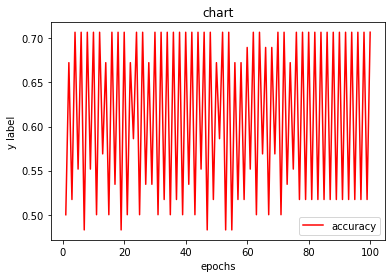

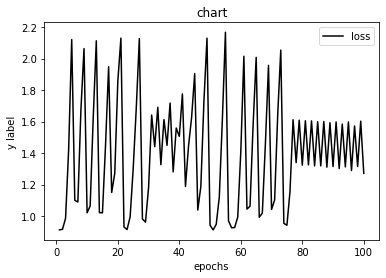

In [217]:
lss = []
acc = []
epochs = []
for epoch in range(100):
    epochs.append(epoch+1)
    ls = train();
    ac = test();
    l_tmp = ls.detach().numpy()
    lss.append(l_tmp)
    acc.append(ac);
    
plt.plot(epochs,acc,color='r',label='accuracy')  
plt.xlabel('epochs')    
plt.ylabel('y label')   
plt.title("chart")      
plt.legend()   
plt.show()

plt.plot(epochs,lss,color=(0,0,0),label='loss')
plt.xlabel('epochs')    
plt.ylabel('y label')   
plt.title("chart")      
plt.legend()            
plt.show()